In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from vqf.preprocessing import create_clauses
from IPython.display import display
import sys

import warnings

warnings.filterwarnings("ignore")

sys.path.append(f"./../")
from src import SpaceEfficientVQF, Clause

## The Original Clauses from Michal Code

In [27]:
# p = 5
# q = 3

# p = 31
# q = 23

p = 11
q = 7

# p = 241
# q = 233

# p = 13
# q = 11

# p = 557
# q = 523

# p, q = 1481, 997

m = p * q

# m = 2459063
vqf = SpaceEfficientVQF(m)

In [28]:
for c in vqf.simplified_clauses:
    if c != 0:
        display(c)

p_2 + 2*q_1 + q_2 - 2*z_2_3 - 1

p_2*q_1 + p_3 + q_1*q_2 + q_3 + z_2_3 - 2*z_3_4 - 4*z_3_5 - 1

p_2*q_2 + p_3*q_1 + p_4 + q_1*q_3 + z_3_4 - 2*z_4_5 - 4*z_4_6

p_2*q_3 + p_3*q_2 + p_4*q_1 + p_5 + z_3_5 + z_4_5 - 2*z_5_6

p_3*q_3 + p_4*q_2 + p_5*q_1 + p_6 + z_4_6 + z_5_6 - 1

p_4*q_3 + p_5*q_2 + p_6*q_1

p_5*q_3 + p_6*q_2

p_6*q_3

## The Limited Clauses 

In [29]:
for c in vqf.selected_clauses:
    display(c.clause)
    print(f"The number of pq variables: {len(c.pq_part.free_symbols)}")

p_2 + 2*q_1 + q_2 - 2*z_2_3 - 1

The number of pq variables: 3


p_2*q_1 + p_3 + q_1*q_2 + q_3 + z_2_3 - 2*z_3_4 - 4*z_3_5 - 1

The number of pq variables: 5


p_2*q_2 + p_3*q_1 + p_4 + q_1*q_3 + z_3_4 - 2*z_4_5 - 4*z_4_6

The number of pq variables: 6


p_2*q_3 + p_3*q_2 + p_4*q_1 + p_5 + z_3_5 + z_4_5 - 2*z_5_6

The number of pq variables: 7


p_3*q_3 + p_4*q_2 + p_5*q_1 + p_6 + z_4_6 + z_5_6 - 1

The number of pq variables: 7


p_4*q_3 + p_5*q_2 + p_6*q_1

The number of pq variables: 6


p_5*q_3 + p_6*q_2

The number of pq variables: 4


p_6*q_3

The number of pq variables: 2


## The Generated superposition Tables

In [30]:
from src.clause_utils import get_key_by_value

superposition_tables = vqf.superposition_tables
for t in superposition_tables:
    c = get_key_by_value(vqf.table_clause_dict, t)
    print(c.clause)
    print(t.table)
    print(f"Compression Ratio: {t.calc_r()}")
    print("---------------------------------------")

p_2 + 2*q_1 + q_2 - 2*z_2_3 - 1
   q_1  q_2  p_2
0    0    0    1
1    0    1    0
2    1    0    1
3    1    1    0
Compression Ratio: -1.0
---------------------------------------
p_6*q_3
   p_6  q_3
0    0    0
1    0    1
2    1    0
Compression Ratio: -0.4150374992788439
---------------------------------------


In [31]:
table = superposition_tables[0]
display(table.table)

,q_1,q_2,p_2
0,0,0,1
1,0,1,0
2,1,0,1
3,1,1,0


In [32]:
from qiskit.visualization import array_to_latex

desired_state = table.get_init_state()
array_to_latex(desired_state)

<IPython.core.display.Latex object>

In [33]:
import numpy as np

np.nonzero(desired_state)

(array([1, 2, 5, 6], dtype=int64),)

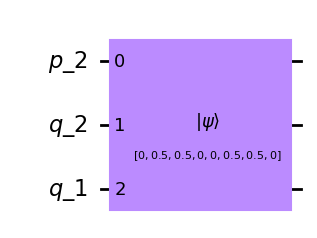

In [34]:
from qiskit import QuantumCircuit, QuantumRegister

bits = list(table.table.columns)[::-1]

q_regs = []
for i in range(len(bits)):
    q_regs.append(QuantumRegister(1, bits[i]))

qc = QuantumCircuit(*q_regs)
qc.initialize(desired_state, range(len(q_regs)))
qc.draw(output="mpl")

In [35]:
from qiskit import transpile

basis = ["cx", "h", "x", "rz", "sx"]
transpiled_qc = transpile(qc, basis_gates=basis, optimization_level=3)
# Draw the transpiled circuit
# transpiled_qc.draw(output='mpl')

In [36]:
print(transpiled_qc.draw("latex_source"))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{{$\mathrm{global\,phase:\,} \mathrm{\pi}$}
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{p\_2} :  } & \lstick{{p\_2} :  } & \gate{\mathrm{R_Z}\,(\mathrm{\frac{-\pi}{2}})} & \gate{\mathrm{\sqrt{X}}} & \gate{\mathrm{R_Z}\,(\mathrm{\frac{\pi}{2}})} & \targ & \gate{\mathrm{R_Z}\,(\mathrm{\frac{-\pi}{2}})} & \gate{\mathrm{\sqrt{X}}} & \gate{\mathrm{R_Z}\,(\mathrm{\frac{\pi}{2}})} & \targ & \qw & \qw\\
	 	\nghost{{q\_2} :  } & \lstick{{q\_2} :  } & \gate{\mathrm{R_Z}\,(\mathrm{\frac{-\pi}{2}})} & \gate{\mathrm{\sqrt{X}}} & \gate{\mathrm{R_Z}\,(\mathrm{\frac{\pi}{2}})} & \ctrl{-1} & \qw & \qw & \qw & \ctrl{-1} & \qw & \qw\\
	 	\nghost{{q\_1} :  } & \lstick{{q\_1} :  } & \gate{\mathrm{R_Z}\,(\mathrm{\frac{-\pi}{2}})} & \gate{\mathrm{\sqrt{X}}} & \gate{\mathrm{R_Z}\,(\mathrm{\frac{\pi}{2}})} & \qw & \qw & \qw & \qw & \qw & \qw & \qw\\
\\ }}
\end{document}


In [37]:
# Count the gates in the circuit
gate_counts = transpiled_qc.count_ops()

# Print the gate counts
print("Gate Counts:", gate_counts)

Gate Counts: OrderedDict([('rz', 8), ('sx', 4), ('cx', 2)])


In [38]:
from src.clause_utils import statevector

output_state = statevector(transpiled_qc)
array_to_latex(output_state)

<IPython.core.display.Latex object>

In [39]:
from qiskit.quantum_info import state_fidelity

fid = state_fidelity(desired_state, output_state)
print(f"Fidelity: {round(fid,5)}")

Fidelity: 1.0


In [40]:
table = superposition_tables[1]
display(table.table)

,p_6,q_3
0,0,0
1,0,1
2,1,0


In [41]:
from qiskit.visualization import array_to_latex

desired_state = table.get_init_state()
array_to_latex(desired_state)

<IPython.core.display.Latex object>

In [42]:
import numpy as np

np.nonzero(desired_state)

(array([0, 1, 2], dtype=int64),)

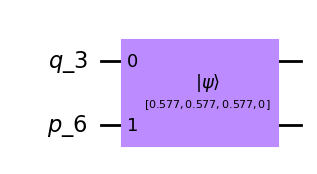

In [43]:
from qiskit import QuantumCircuit, QuantumRegister

bits = list(table.table.columns)[::-1]

q_regs = []
for i in range(len(bits)):
    q_regs.append(QuantumRegister(1, bits[i]))

qc = QuantumCircuit(*q_regs)
qc.initialize(desired_state, range(len(q_regs)))
qc.draw(output="mpl")

In [44]:
from qiskit import transpile

basis = ["cx", "h", "x", "rz", "sx"]
transpiled_qc = transpile(qc, basis_gates=basis, optimization_level=3)
# Draw the transpiled circuit
# transpiled_qc.draw(output='mpl')

In [45]:
print(transpiled_qc.draw("latex_source"))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{{$\mathrm{global\,phase:\,} \mathrm{\frac{\pi}{2}}$}
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q\_3} :  } & \lstick{{q\_3} :  } & \gate{\mathrm{R_Z}\,(\mathrm{-\pi})} & \gate{\mathrm{\sqrt{X}}} & \gate{\mathrm{R_Z}\,(\mathrm{\frac{3\pi}{4}})} & \gate{\mathrm{\sqrt{X}}} & \targ & \gate{\mathrm{R_Z}\,(\mathrm{-\pi})} & \gate{\mathrm{\sqrt{X}}} & \gate{\mathrm{R_Z}\,(\mathrm{\frac{3\pi}{4}})} & \gate{\mathrm{\sqrt{X}}} & \targ & \qw & \qw\\
	 	\nghost{{p\_6} :  } & \lstick{{p\_6} :  } & \gate{\mathrm{R_Z}\,(\mathrm{-\pi})} & \gate{\mathrm{\sqrt{X}}} & \gate{\mathrm{R_Z}\,(\mathrm{1.911})} & \gate{\mathrm{\sqrt{X}}} & \ctrl{-1} & \qw & \qw & \qw & \qw & \ctrl{-1} & \qw & \qw\\
\\ }}
\end{document}


In [46]:
# Count the gates in the circuit
gate_counts = transpiled_qc.count_ops()

# Print the gate counts
print("Gate Counts:", gate_counts)

Gate Counts: OrderedDict([('rz', 6), ('sx', 6), ('cx', 2)])


In [47]:
output_state = statevector(transpiled_qc)
array_to_latex(output_state)

<IPython.core.display.Latex object>

In [48]:
from qiskit.quantum_info import state_fidelity

fid = state_fidelity(desired_state, output_state)
print(f"Fidelity: {round(fid,5)}")

Fidelity: 1.0
